Q.1

In [1]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel='rbf', gamma='auto', C=20)

param_grid = {'kernel': ['linear' , 'rbf'], 'C': [1,15,25]}
svc_grid = GridSearchCV(svc, param_grid=param_grid, cv=4)



In [4]:
#kernel as 'rbf', regularization parameter as 20 and gamma as 'auto'
svc_grid.fit(X_train, y_train)
svc_grid.best_estimator_.fit(X_train, y_train)
svc_grid.score(X_test, y_test)

0.9777777777777777

Q.2

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

pipe = Pipeline([('scaler', MinMaxScaler()),
                 ('svm', SVC(kernel='linear', decision_function_shape='ovr', C=1, class_weight=None))])

pipe.fit(X_train, y_train)
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        18
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



Q.3

In [6]:
X = X[y != 1]
y = y[y != 1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [8]:
pipe = Pipeline([('scaler', MinMaxScaler()),
                 ('classifier', SVC())])

pipe.fit(X_train, y_train)
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        24

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Q.4

In [9]:
from sklearn.svm import LinearSVC


def compute_score(X_train, X_test, y_train, y_test):
  lsvc = LinearSVC(loss='hinge', random_state=42, penalty='l2')
  lsvc.fit(X_train, y_train)
  return lsvc.score(X_test, y_test)

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(compute_score(X_train, X_test, y_train, y_test))

0.9777777777777777


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Q.5

In [10]:
from sklearn.model_selection import GridSearchCV

def hyperparameter_search(kernel, regularization):
  lsvc = SVC(kernel='linear', C=1)
  pipe = Pipeline([('lsvc', lsvc)])
  gcv = GridSearchCV(pipe, scoring='accuracy', param_grid={'lsvc__kernel': kernel, 'lsvc__C': regularization}, cv=10)
  gcv.fit(X_train, y_train)
  
  best = gcv.best_estimator_
  best[-1].fit(X_train, y_train)  # fitting on the best estimator
  return best[-1].score(X_test, y_test)

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
hyperparameter_search(kernel=['linear', 'rbf'], regularization=[5, 10,100])

0.9777777777777777

Graded

Q.1

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

kernels = ['linear' , 'rbf']
regularizations = [1,15,25]

lsvc = SVC(kernel='linear', gamma='auto', C=1)
pipe = Pipeline([('lsvc', lsvc)])
gcv = GridSearchCV(pipe, param_grid={'lsvc__kernel': kernels, 'lsvc__C': regularizations},cv=4, return_train_score=True)
gcv.fit(X_train, y_train)
gcv.cv_results_['mean_train_score'].mean(), gcv.cv_results_['mean_test_score'].mean()

(0.9883425294817699, 0.9541191832858501)

In [13]:
gcv.best_score_

0.9807692307692308

In [14]:
lsvc = gcv.best_estimator_
cross_val_score(lsvc, X_train, y_train, cv=4).mean()

0.9807692307692308

Q.2

In [15]:
import pandas as pd

data = pd.read_csv('Social_Network_Ads.csv')

In [16]:
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']
X.shape, y.shape

((400, 2), (400,))

In [17]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = X[:75*4], X[75*4:], y[:75*4], y[75*4:]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 2), (100, 2), (300,), (100,))

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

pipe = Pipeline([('scaler', StandardScaler()), 
          ('svc', SVC(kernel='linear', random_state=0))])

pipe.fit(X_train, y_train)

print(accuracy_score(y_test, pipe.predict(X_test)))

0.9


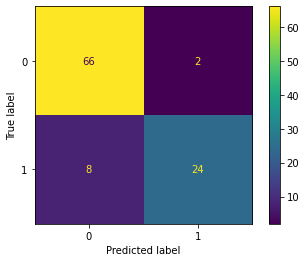

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, pipe.predict(X_test), values_format='0.5g')

In [21]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [22]:
X_train, X_test, y_train, y_test = X[:20000], X[20000:25000], y[:20000], y[20000:25000]

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000, 784), (5000, 784), (20000,), (5000,))

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

svc_pipe = Pipeline([('scaler', MinMaxScaler()),
          ('svc', SVC(kernel='linear', decision_function_shape='ovr', class_weight=None))])

svc_pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', SVC(kernel='linear'))])

In [25]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_test, svc_pipe.predict(X_test))
con_matrix.diagonal().sum()

4623

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svc_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       478
           1       0.95      0.98      0.97       568
           2       0.92      0.92      0.92       521
           3       0.91      0.90      0.90       516
           4       0.91      0.94      0.92       500
           5       0.88      0.88      0.88       460
           6       0.97      0.96      0.96       491
           7       0.91      0.96      0.94       504
           8       0.93      0.85      0.89       466
           9       0.92      0.88      0.90       496

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svc_pipe = Pipeline([('scaler', StandardScaler()),
          ('svc', SVC(kernel='poly', degree=3, decision_function_shape='ovr', class_weight='balanced', C=10))])

svc_pipe.fit(X_train, y_train)
print(classification_report(y_test, svc_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3463
           1       0.99      0.99      0.99      3927
           2       0.96      0.97      0.96      3520
           3       0.98      0.96      0.97      3551
           4       0.96      0.98      0.97      3333
           5       0.97      0.97      0.97      3144
           6       0.98      0.98      0.98      3490
           7       0.98      0.97      0.97      3718
           8       0.96      0.96      0.96      3344
           9       0.96      0.96      0.96      3510

    accuracy                           0.97     35000
   macro avg       0.97      0.97      0.97     35000
weighted avg       0.97      0.97      0.97     35000



In [29]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [31]:
from sklearn.svm import SVC
svc = SVC(kernel='poly', C=10, gamma='auto')
svc.fit(X_train, y_train)

SVC(C=10, gamma='auto', kernel='poly')

In [32]:
svc.score(X_test, y_test)
# accuracy_score(y_test, svc.predict(X_test))

0.7333333333333333

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', C=25, gamma='auto')
svc.fit(X_train, y_train)

SVC(C=25, gamma='auto', kernel='sigmoid')

In [35]:
accuracy_score(y_test, svc.predict(X_test))

0.28888888888888886

In [36]:
import numpy as np
X_new, y_new = X[np.where(y != 0)], y[np.where(y != 0)]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.25, random_state=0)

In [38]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           2       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25

